# Assignment - Image Classification with CNNs
![CIFAR10](https://miro.medium.com/max/964/1*syyml8q8s1Yt-iEea5m1Ag.png)

[CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) is a small toy data set for image classifaction. 

* It has 60k images from ten diffenrent classes (like car, airplane, horse,..)
* The RGB images are of size 32x32 pixels  

In [20]:
#import needed libs
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

#some vars to controll the training -> use them in your code
batch_size = 32
num_classes = 10 #fixed!
epochs = 10

# Get the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Task:
* visualize some sample images from different classes
* build and train the ***AlexNet*** CNN architecture from the lecture, use the following Keras layers:
    * overview: https://keras.io/api/layers/
    * 2d convolution: https://keras.io/api/layers/convolution_layers/convolution2d/
    * Fully Connected (=Matrix Multiplication MLP): https://keras.io/api/layers/core_layers/dense/
    * Pooling: https://keras.io/api/layers/pooling_layers/max_pooling2d/   
* use 'relu' functions for the non-linear activation -> https://keras.io/api/layers/activation_layers/relu/
* optimize the learning hyper-paramters to get the best  test accuracy

In [21]:
#imports 
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

from tensorflow.keras.layers.experimental.preprocessing import Normalization

from tensorflow.keras.layers.experimental.preprocessing import Rescaling

from tensorflow.keras import layers

In [57]:
validation_images, validation_labels = x_train[:5000], y_train[:5000]
x_train, y_train = x_train[5000:], y_train[5000:]

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

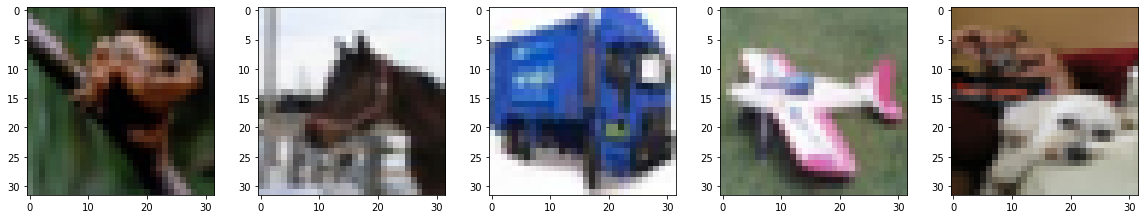

In [58]:
plt.figure(figsize=(20,20))
for i, (image, label) in enumerate(train_ds.take(5)):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image)


In [50]:
inputs = keras.Input(shape=(32, 32, 3))


In [74]:
def process_images(image, label):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 277x277
    #image = tf.image.resize(image, (32,32))
    return image, label

train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
validation_ds_size = tf.data.experimental.cardinality(validation_ds).numpy()
print("Training data size:", train_ds_size)
print("Test data size:", test_ds_size)
print("Validation data size:", validation_ds_size)

train_ds = (train_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
test_ds = (test_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))

Training data size: 43
Test data size: 9
Validation data size: 5000


In [75]:
# Rescale images to [0, 1]
l1 = Rescaling(scale=1.0 / 255)(inputs)
l2 = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(l1)

# 2DConv & Pooling Layer
l3 = layers.BatchNormalization()(l2)
l4 = layers.MaxPooling2D(pool_size=(3, 3))(l3)
l5 = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(l4)
l6 = layers.BatchNormalization()(l5)
l7 = layers.MaxPooling2D(pool_size=(3, 3))(l6)

l8 = layers.Flatten()(l7)
l9 = layers.Dense(32, activation='relu')(l8)
l10 = layers.Dropout(0.5)(l9)
l11 = layers.Dense(32, activation='relu')(l10)
# Apply global average pooling
#l5 = layers.GlobalAveragePooling2D()(l4)
#outputs
outputs = layers.Dense(num_classes, activation="softmax")(l11)



In [76]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [77]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
rescaling_6 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
batch_normalization_10 (Batc (None, 8, 8, 32)          128 

In [78]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

In [83]:
model.fit(x_train, y_train,
          batch_size=batch_size, epochs=epochs)

Epoch 1/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2559
Epoch 2/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2431
Epoch 3/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2281
Epoch 4/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2235
Epoch 5/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2140
Epoch 6/10
1407/1407 [==============================] - 5s 3ms/step - loss: 1.2081
Epoch 7/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1984
Epoch 8/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1919
Epoch 9/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1831
Epoch 10/10
1407/1407 [==============================] - 5s 3ms/step - loss: 1.1759


In [9]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
print("Fit on Dataset")
history = model.fit(dataset, epochs=epochs)

Fit on Dataset
Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5715
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5584
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5461
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5346
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5238
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5134
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5038
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4948
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4865
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4787


In [84]:
loss, acc = model.evaluate(test_ds)  # returns loss and metrics
print("loss: %.2f" % loss)
print("acc: %.2f" % acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:583: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: ignored